# K-Nearest Neighbors (KNN) Classification

KNN, short for k-nearest neighbors, is an easy classification algorithm. Imagine points on a graph with different colors. If you have a new point without a color, KNN helps by looking at its nearest neighbors.

## How KNN Works:

1. **Neighbors:** "k" is the number of nearby points to consider. If k is 3, check the three closest points to the new one.
2. **Distance:** KNN measures the distance between the new point and its neighbors, like how far you'd walk from one point to another.
3. **Majority Wins:** Find which group the majority of the closest neighbors belong to. If two of three closest points are red and one is blue, guess the new point is likely red.

In simpler terms, KNN predicts the group of a new point based on what most of its nearby neighbors are like. It's like asking friends for advice – if most suggest something, you might go with that. KNN does a similar thing with points.

Here's a simple code snippet to illustrate:



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing Iris dataset in Jupyter Notebook
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
# There are the feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# There are the values of the target variable
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# combining everything in a dataframe
data=pd.DataFrame(data=iris.data,columns=iris.feature_names)
data["target"]=iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
iris.target_names[0]

'setosa'

In [8]:
iris.target_names[1]

'versicolor'

In [9]:
iris.target_names[2]

'virginica'

In [10]:
data["flower_name"]=data.target.apply(lambda x: iris.target_names[x])

In [11]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [12]:
df0=data[data.target==0]
df1=data[data.target==1]
df2=data[data.target==2]

Text(0, 0.5, 'Sepal Width')

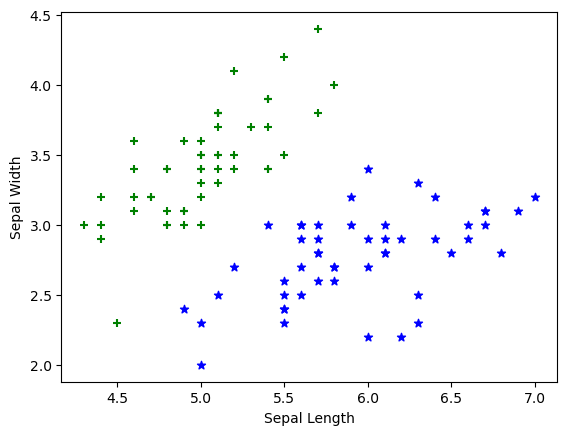

In [13]:
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color="green",marker="+")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color="blue",marker="*")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

## Separability of Setosa and Versicolor Classes

I plotted the sepal length and sepal width of the iris flowers belonging to the setosa and versicolor classes. The scatter plot visually demonstrates that these two classes are clearly separable. Let me break down this observation:

### Setosa vs. Versicolor

1. **Sepal Length:**
   - Setosa flowers generally have shorter sepal lengths, forming a distinct cluster on the left side of the plot.
   - Versicolor flowers, on the other hand, tend to have longer sepal lengths, forming a separate cluster on the right side.

2. **Sepal Width:**
   - The setosa class typically has a wider range of sepal widths, but it remains distinct from the versicolor class.
   - Versicolor flowers cluster within a specific range of sepal widths, contributing to the separation from setosa.

### Visual Interpretation

From the scatter plot, you can easily distinguish between setosa and versicolor based on these sepal measurements. This clear separation is beneficial for machine learning models, making it easier for them to learn and predict the class of iris flowers based on sepal length and width.

In summary, the distinct clusters formed by setosa and versicolor in the scatter plot indicate a high degree of separability between these two classes, specifically in terms of sepal length and sepal width.


Text(0, 0.5, 'Petal Width (cm)')

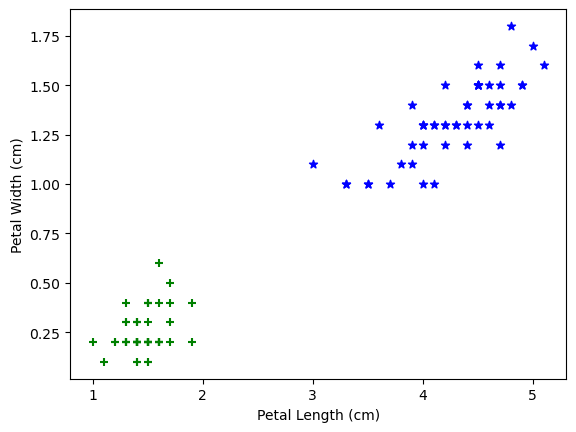

In [14]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color="green",marker="+")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="blue",marker="*")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

## Separability of Setosa and Versicolor Classes

I created a scatter plot using the petal length and petal width features of iris flowers. The green markers represent setosa flowers, while the blue markers represent versicolor flowers.

### Observations:

- **Petal Length vs. Petal Width:**
  - Setosa flowers (green markers) form a distinct cluster in the lower range of both petal length and width.
  - Versicolor flowers (blue markers) cluster separately, with a slightly larger range in both petal dimensions.

### Conclusion:

From the scatter plot, it's evident that setosa and versicolor classes are clearly separable based on petal length and width. This visual insight can be valuable for building and training machine learning models to predict iris flower classes.


Text(0, 0.5, 'Sepal Width')

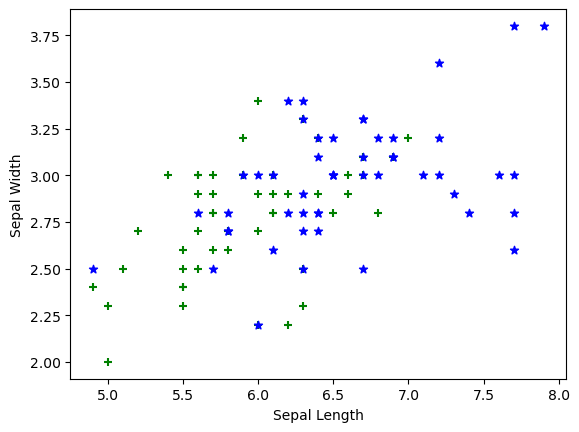

In [15]:
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color="green",marker="+")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color="blue",marker="*")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

## Separability of Versicolor and Virginica Classes

I created a scatter plot using the sepal length and sepal width features of iris flowers. Blue markers represent versicolor flowers, while red markers represent virginica flowers.

### Observations:

- **Sepal Length vs. Sepal Width:**
  - Unlike the clear separation seen in the petal dimensions for setosa and versicolor, the sepal dimensions of versicolor and virginica overlap.
  - Versicolor flowers (blue markers) and virginica flowers (red markers) do not form distinct clusters, making it challenging to separate them based solely on sepal length and width.

### Conclusion:

The scatter plot suggests that sepal length and sepal width alone may not be sufficient for a clear separation between versicolor and virginica classes. Additional features or a more complex model may be needed for accurate classification in this case.


Text(0, 0.5, 'Petal Width (cm)')

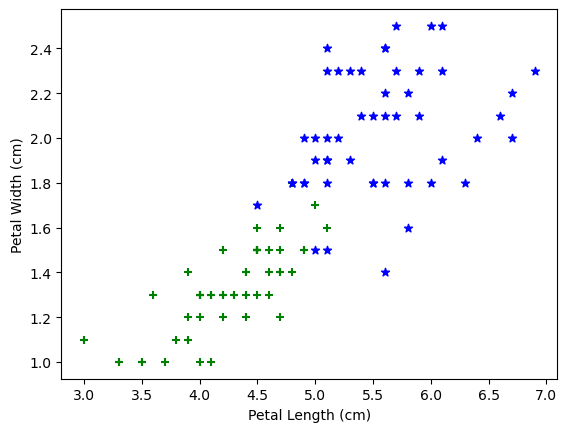

In [16]:
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="green",marker="+")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="blue",marker="*")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

## Separability Comparison: Petal vs. Sepal Dimensions

I created two scatter plots to compare the separability of classes using different dimensions of iris flowers.

### 1. Petal Length and Petal Width:

- The scatter plot based on petal length and petal width shows distinct clusters for the versicolor and virginica classes.
- Green markers represent versicolor, and blue markers represent virginica.
- The separation between the two classes is visually clearer, indicating that petal dimensions contribute more to the distinction.

### 2. Sepal Length and Sepal Width:

- In contrast, the scatter plot based on sepal length and sepal width shows less distinct separation between versicolor and virginica.
- The clusters overlap, making it challenging to separate the two classes based solely on sepal dimensions.

### Conclusion:

The observation suggests that, in this particular dataset, petal length and petal width are more informative features for distinguishing between versicolor and virginica classes. Petal dimensions provide a clearer separation compared to sepal dimensions. This insight can be valuable when selecting features for classification models, emphasizing the importance of considering different aspects of the data in the analysis.


In [17]:
# Performing KNN classification over the iris datset

In [18]:
## Defining X and y and splitting the data into train and test datset

In [19]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-2], data['target'], test_size=0.3, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
y_predict=knn.predict(X_test)

C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [23]:
knn.score(X_test,y_test)

C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [27]:
# Comparision of the true reusults with the predicted ones
np.where(y_test==0,"setosa",np.where(y_test==1,"virginica","versicolor"))==np.where(knn.predict(X_test)==0,"setosa",np.where(knn.predict(X_test)==1,"virginica","versicolor"))

C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [25]:
from sklearn.metrics import confusion_matrix

In [31]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

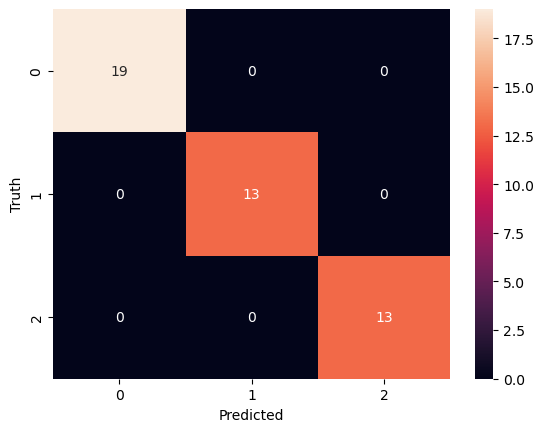

In [34]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [36]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

